# CHEM 10 - Lab 3: Thermodynamics: Vaporization of Water

In this lab you will measure the partial pressure of water vapor via Dalton's Law and determine the entropy and enthalpy of vaporization of water by plotting your data with the Clausius-Clapeyron relationship.  You will be measuring the volume of air in your graduated cylinder at various temperatures, then will do some calculations to find the vapor pressure of water at each temperature using Dalton’s law of partial pressures. 

This Jupyter notebook will guide you through the calculations needed as well as how to make a plot of ln P_water vs 1/T, then the steps to find the best fit line (via linear regression). The equation of the best fit line with the Clausius-Clapeyron equation can be used to determine the enthalpy and entropy of vaporization. A sample text files with data is provided, but you will need to use your own data. You can either replace this data with your data in this file, or make a new file and update the code below with the names of the new files. Three values measured in lab should be entered below: the barometric pressure of the atmosphere, and the cold temperature and corresponding volume at that cold temperature. These will be used to determine the number of moles of air. 

First, load some of the python libraries. This will help us with some calculations and making plots.

In [3]:
import numpy
import scipy
import matplotlib.pyplot as plt
from scipy import stats

In [30]:
# Set up any constants, general measurements we will use
R = 0.082057   #L atm mol-1 K-1
P_room = 29.61 # barometric pressure measured in the room, in inches of Hg
T_cold = 0.5 # cold temperature measurement, in Celsius
V_cold = 3.4 # cold volume measurement, in mL

Next, set up some empty arrays that we will populate with the data you collected that you have put into the text files.

In [7]:
# Set up empty arrays for the data from the text files
temperature =  [] 
volume = []

Next, read in the data from the text file, 'LAB_3.temp_volume.txt'. This file should have your temperature values (in Celsius) and your volume values (in mL). The code is set up to read in data delimited (separated) by spaces, but depending on how you enter your data, you can change this to be tab (\t) or comma delimited. The code below is set up to skip the first one line of text (the header). 

In [8]:
# Read in the data from the txt file, but skip the header on the first line 
# The output of this function is a list of lists; that is, each row is a entry in our list, but each row is itself a list of values. 
file = ('LAB_3.temp_volume.txt')  
values = numpy.genfromtxt(fname=file, skip_header=1, delimiter=None, dtype='unicode')
print(values)

[['80.0' '7.7']
 ['75.0' '6.8']
 ['70.0' '5.8']
 ['65.0' '5.2']
 ['60.0' '4.9']
 ['55.0' '4.6']
 ['50.0' '4.4']]


In [9]:
# CI to do: set up arrays for the math so that a formatted table can be printed. 

Check that these values match what is in your data text file. Next, we will load these values from the text file into the arrays using a for loop in which we append each value (add to the end of the array). Sometimes it is useful to print things out along the way to understand what your code is doing. Feel free to remove the # in the print statements below to try and understand each step. Keep in mind that you are adding values to an array, so if you re-run the code in this cell, you will just keep adding values. To start from scratch, re-run the empty array code above first, then each code cell after. Here we are recasting our values from strings into floats.

In [9]:
for i in range(0, len(values)):
    #print(i)
    #print(values[i,0])
    temperature.append(float(values[i,0])); 
    volume.append(float(values[i,1]));

print (temperature)
print (volume)

[80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0]
[7.7, 6.8, 5.8, 5.2, 4.9, 4.6, 4.4]


Check that you have two separate arrays with the correct values. The lab report requires a table of values, so let's do that mathematical manipulation next. First, let's do the temperature, converted to Kelvin and inverse temp (1/T). 

In [15]:
# Set up empty arrays for the data 
temperature_K =  [] 
inverse_temperature_K = []

In [16]:
for i in range(0, len(temperature)):
    #print(i)
    temperature_K.append(temperature[i]+273.15); 
    inverse_temperature_K.append(1/temperature_K[i]); 

print (temperature_K)
print (inverse_temperature_K)

[353.15, 348.15, 343.15, 338.15, 333.15, 328.15, 323.15]
[0.002831657935721365, 0.002872325147206664, 0.002914177473408131, 0.0029572674848440043, 0.0030016509079994, 0.0030473868657626088, 0.0030945381401825778]


Think about your values. Do they make sense based on the math that you did in the code? If so, next we convert the volume values, correcting for the 0.2 mL and converting from mL to L. 

In [21]:
# Set up empty arrays for the data 
volume_L =  [] 

# append new converted values to array
for i in range(0, len(volume)):
    #print(i)
    volume_L.append((volume[i] - 0.2) / 1000); 

print (volume_L)

[0.0075, 0.0066, 0.0056, 0.005, 0.0047, 0.004399999999999999, 0.004200000000000001]


Think about your values. Do they make sense based on the math that you did in the code? If so, next we determine the number of moles of air from our cold temperature measurement using the ideal gas law, following Equation 4 from the lab procedure. This uses the values from the top of the noteboook that should be modified to fit your measured values from lab. Remember that we need to convert the units of pressure from inches of Hg to atm

In [31]:
# Equation 4
n_air = ( (P_room * 25.4 / 760 ) * ((V_cold - 0.2) / 1000) ) / (R * (T_cold + 273.15))  
print (n_air)

0.00014102542669737784


You should get a small number here - around 10$^{-4}$. Now that the numer of moles is computed, we can use the law of partial pressures to determine the pressure values for the corresponding temperature and volume, Equation 5. We can also compute the vapor pressure of the water (Equation 6) and its natural log so we have everything we need to make the plot. 

In [36]:
# Set up empty arrays for the data 
pressure_air =  [] 
pressure_water =  [] 
log_pressure_water =  [] 

# Equations 5 and 6 
# append new converted values to array
for i in range(0, len(volume)):
    #print(i)
    pressure_air.append((n_air * R * temperature_K[i])/ volume_L[i])
    pressure_water.append((P_room * 25.4 / 760 ) - pressure_air[i])
    log_pressure_water.append(numpy.log(pressure_water[i]))

print (pressure_air)
print (pressure_water)
print (log_pressure_water)

[0.5448927189744871, 0.6104295113812301, 0.7091025282006403, 0.7826227081462104, 0.8202665794762805, 0.863043705987724, 0.8903646878936786]
[0.4447046494465654, 0.37916785703982236, 0.28049484022041216, 0.20697466027484213, 0.16933078894477205, 0.12655366243332855, 0.09923268052737388]
[-0.8103449262771345, -0.9697762773843839, -1.271199949124717, -1.5751589073411867, -1.7759011461013556, -2.0670888518066257, -2.3102878781448752]


Ok, now everything is computed for the table and the plot. Let's print out all the values formatted for a table. 

In [60]:
print ('T(C)\t T(K)\t  1/T(1/K)\t vol(mL) vol-0.2mL(L)\t  P_air\t         P_water\t  ln P_water')
for i in range(0, len(volume)):
    print("{:.1f}\t {:.2f}\t {:.6f}\t {:.1f}\t   {:.4f}\t {:.6f}\t {:.6f}\t {:.6f} ".format(temperature[i], temperature_K[i], inverse_temperature_K[i], volume[i], volume_L[i], pressure_air[i], pressure_water[i], log_pressure_water[i]))


T(C)	 T(K)	  1/T(1/K)	 vol(mL) vol-0.2mL(L)	  P_air	         P_water	  ln P_water
80.0	 353.15	 0.002832	 7.7	   0.0075	 0.544893	 0.444705	 -0.810345 
75.0	 348.15	 0.002872	 6.8	   0.0066	 0.610430	 0.379168	 -0.969776 
70.0	 343.15	 0.002914	 5.8	   0.0056	 0.709103	 0.280495	 -1.271200 
65.0	 338.15	 0.002957	 5.2	   0.0050	 0.782623	 0.206975	 -1.575159 
60.0	 333.15	 0.003002	 4.9	   0.0047	 0.820267	 0.169331	 -1.775901 
55.0	 328.15	 0.003047	 4.6	   0.0044	 0.863044	 0.126554	 -2.067089 
50.0	 323.15	 0.003095	 4.4	   0.0042	 0.890365	 0.099233	 -2.310288 


Now we are ready to plot our data and then do a linear regression (best fit line). 

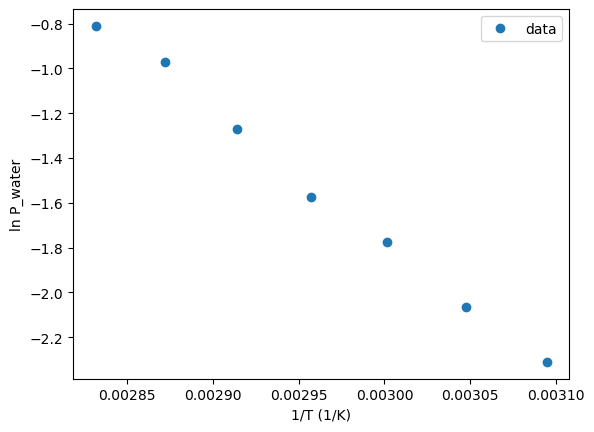

In [61]:
# Plot your data
# You can change the text to represent the x and y axes labels
plt.figure()
plt.xlabel('1/T (1/K)')
plt.ylabel('ln P_water')
plt.plot(inverse_temperature_K, log_pressure_water, 'o', label='data')
plt.legend()
#plt.ylim(-10, 180)
#plt.xlim(-300, 110)

Does the data look like a straight line with decreasing slope? If yes, good! Now we do the linear regression fit. If we have the x and y values, we can use the stats package to compute the best fit line for this data. This is done with linear regression in the stats package / library, and will generate a slope, intercept, and rvalue from a linear regression fit. If you are curious, you can search for stats.linregress to find out more about how it works.

In [62]:
print("\nDetermining best fit line... \n")
# Use linear regression to determine the best fit line
fit = stats.linregress(inverse_temperature_K, log_pressure_water)
print(f"R-squared: {fit.rvalue**2:.6f}")
print(f"Slope: {fit.slope:.6e}")
print(f"intercept: {fit.intercept:.6e}")


Determining best fit line... 

R-squared: 0.996276
Slope: -5.868913e+03
intercept: 1.583118e+01


Think about your values - does the slope make sense based on your data? Let's save these values as text so that we can add them to our plot later. We will save each value in float format with four decimal places.

In [64]:
R_text = f"R^2 = {fit.rvalue**2:.4f}"
eqn_text = f"y = {fit.slope:.4f} x + {fit.intercept:.4f}" # y = mx + b
print(R_text)
print(eqn_text)

R^2 = 0.9963
y = -5868.9132 x + 15.8312


Now we determine the fit values from our equation of the best fit line so that we can add them to the graph.

In [67]:
# Use slope from the fit to determine the fitted values for the plot
# We use y = mx + b to determine the y value for the best fit line
fit_log_pressure_water = []  # create empty array
for value in inverse_temperature_K:
    temp = fit.slope * value + fit.intercept
    fit_log_pressure_water.append(temp)

print(fit_log_pressure_water)

[-0.7875720809533711, -1.026244416347918, -1.2718720871757903, -1.524763625246834, -1.7852460844666425, -2.05366645193633, -2.3303931900533854]


Did you generate the right number of values for your array? If so, we will add this new array of best fit data to the plot, and add text for the equation for the best fit line.



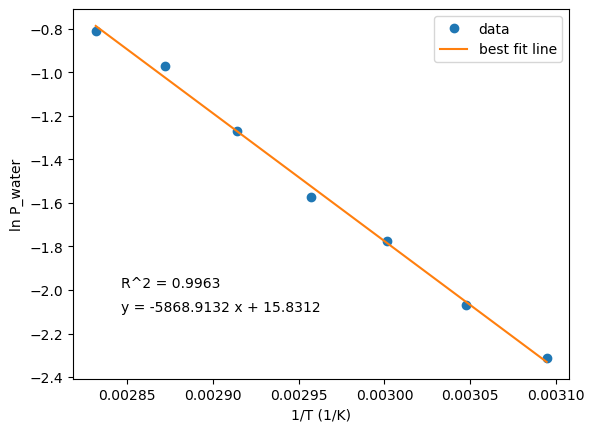

In [70]:
plt.figure()
plt.xlabel('1/T (1/K)')
plt.ylabel('ln P_water')
plt.plot(inverse_temperature_K, log_pressure_water, 'o', label='data')
plt.plot(inverse_temperature_K, fit_log_pressure_water, '-', label='best fit line') 
plt.legend()
#adding text inside the plot
plt.figtext(0.2, 0.25, eqn_text)  # Place the equation text where you want it
plt.figtext(0.2, 0.3, R_text)
#plt.show()
plt.savefig('Lab_3.Vaporization_of_Water.png')

The slope and the intercept of our line can be used to determine the enthalpy and entropy of vaporization with the Clausius-Clapeyron equation (Equation 3). Note that we now use the ideal gas constant value of R = 8.3145 J mol-1 K-1.

In [73]:
 # R is the ideal gas constant (8.3145 J mol-1 K-1).
ideal_gas_constant = 8.3145

enthalpy = -fit.slope * ideal_gas_constant
print(enthalpy)

48797.07902656012


In [74]:
entropy = fit.intercept * ideal_gas_constant
print (entropy)

131.62836799849475


Use these values and Equation 3 (where P° is 1 atm) to determine the vapor
pressure of water at 65 ºC and at the temperature when cooled to less than 3ºC.